In [3]:
import os
import sys
sys.path.append('/scratch_tmp/users/k21066795/NBT-phenotyping')
import glob
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
import leidenalg
import scanpy as sc
import anndata

import seaborn as sns
import matplotlib.pyplot as plt
from utils_pheno import * 

In [ ]:
file_path = f'/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/adata/adata_UNI_aug_normal.h5ad'
adata_normal = sc.read_h5ad(file_path)

for resolution in [0.5, 1.0, 1.5, 2.0]:
    adata_normal = run_leiden_umap(adata_normal, resolution=resolution)

adata.write('/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/adata/adata_UNI_aug_normal_4levels.h5ad')

In [4]:
file_path = '/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/adata/adata_UNI_aug_normal_4levels.h5ad'
adata_normal = sc.read_h5ad(file_path)
adata_normal

AnnData object with n_obs × n_vars = 33090 × 512
    obs: 'patch_id', 'cohort', 'wsi_id', 'source', 'leiden_0.5', 'highlight', 'size', 'alpha', 'top_samples', 'label', 'leiden_1.0', 'umap1', 'umap2', 'leiden_0.5_top_samples', 'leiden_1.0_top_samples', 'leiden_1.5', 'leiden_1.5_top_samples', 'leiden_2.0', 'leiden_2.0_top_samples'
    uns: 'cohort_colors', 'highlight_colors', 'label_colors', 'leiden_0.5', 'leiden_0.5_colors', 'leiden_0.5_sizes', 'leiden_1.0', 'leiden_1.0_colors', 'leiden_1.0_sizes', 'leiden_1.5', 'leiden_1.5_colors', 'leiden_1.5_sizes', 'leiden_2.0', 'leiden_2.0_colors', 'leiden_2.0_sizes', 'nn_15', 'paga', 'pca', 'source_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'nn_15_connectivities', 'nn_15_distances'

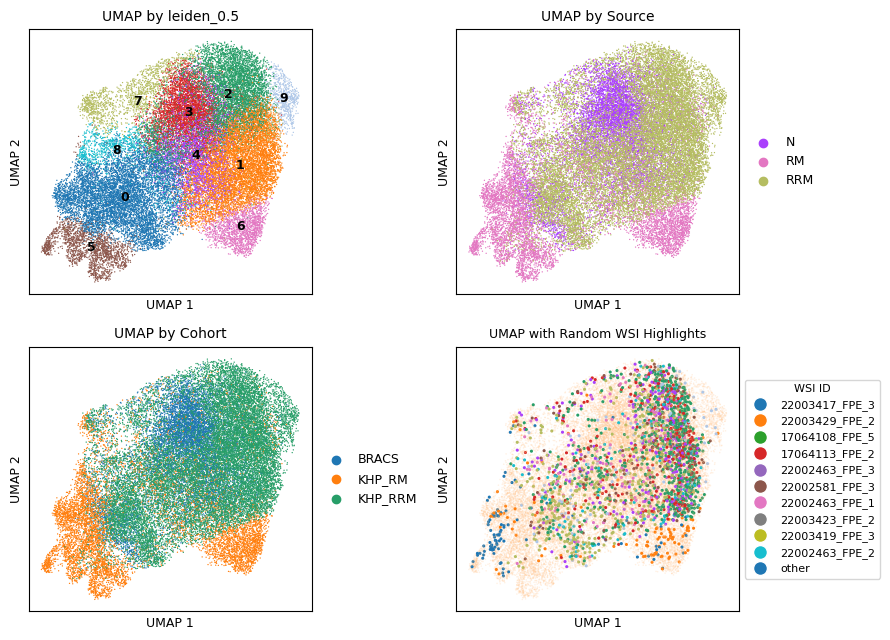

In [5]:
groupby = 'leiden_0.5'

fig, axes = plt.subplots(2, 2, figsize=(9, 6.5))

sc.pl.umap(adata_normal, color=groupby, legend_fontsize=9, legend_loc='on data', ax=axes[0, 0], show=False)
axes[0, 0].set_title(f'UMAP by {groupby}', fontsize=10)
axes[0, 0].set_xlabel("UMAP 1", fontsize=9)
axes[0, 0].set_ylabel("UMAP 2", fontsize=9)

sc.pl.umap(adata_normal, color="source", legend_fontsize=9, ax=axes[0, 1], show=False)
axes[0, 1].set_title('UMAP by Source', fontsize=10)
axes[0, 1].set_xlabel("UMAP 1", fontsize=9)
axes[0, 1].set_ylabel("UMAP 2", fontsize=9)

sc.pl.umap(adata_normal, color="cohort", legend_fontsize=9, ax=axes[1, 0], show=False)
axes[1, 0].set_title('UMAP by Cohort', fontsize=10)
axes[1, 0].set_xlabel("UMAP 1", fontsize=9)
axes[1, 0].set_ylabel("UMAP 2", fontsize=9)

plot_umap_with_random_wsi(adata_normal, n_iterations=10, fontsize=8, ax=axes[1, 1])
axes[1, 1].set_title('UMAP with Random WSI Highlights', fontsize=9)
axes[1, 1].set_xlabel("UMAP 1", fontsize=9)
axes[1, 1].set_ylabel("UMAP 2", fontsize=9)

plt.tight_layout()
# plt.savefig(f'/scratch_tmp/{model_stain}_umap_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()

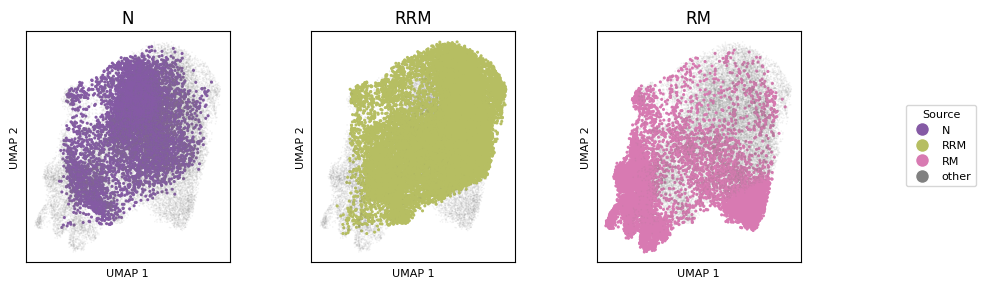

In [6]:
orders = ['N', 'RRM', 'RM']
colors = {'N': '#855AA5', 'RM': '#D87AB2', 'RRM': '#B6BE62', 'other': 'gray'}
# save_pt = f'/scratch_tmp/prj/cb_normalbreast/prj_NBTPhenotyping/RESULTS/umap/Umap_eachTissue_{model_stain}_{groupby}_clean.png'
plot_umap_highlight_each_source(adata_normal, max_size=20, min_size=1, grid_size=[1,3], figsize=(10, 3), fontsize=10, orders=orders, colors=colors, save_pt=None)

In [7]:
adata_normal.obs.index = adata_normal.obs['patch_id']
adata_normal = calculate_top_samples(adata_normal, groupby, top_n=100)

Top 100 central samples indices: Index(['21002312_FPE_3_62940_41507_14403_25980_124_99_578',
       '22002580_FPE_2_48378_30431_74594_49699_175_81_578',
       '22003436_FPE_2_116695_56484_9751_8593_205_103_578',
       '21002311_FPE_3_64660_27566_10342_8023_117_54_578',
       '22002462_FPE_3_74467_7276_12073_9177_140_23_578',
       'BRACS_1507_N_1_1536_2560',
       '22003426_FPE_3_52584_42133_15006_13844_111_77_578',
       '20001509_FPE_2_72746_73326_18449_13814_136_138_578',
       '22003416_FPE_2_55241_69692_16673_16673_106_143_578',
       'BRACS_1231_N_19_0_1280',
       ...
       '22003430_FPE_1_45992_10152_43842_49045_140_25_578',
       '22003430_FPE_3_80676_38477_37465_19563_169_89_578',
       '22003430_FPE_2_93024_27556_20187_28298_190_80_578',
       '22003430_FPE_2_101715_58842_16711_18449_193_109_578',
       '22002137_FPE_3_33970_56012_5129_6290_64_102_578',
       '22003430_FPE_2_51310_12492_52632_71751_153_40_578',
       '22003430_FPE_2_93024_27556_20187_28298_18

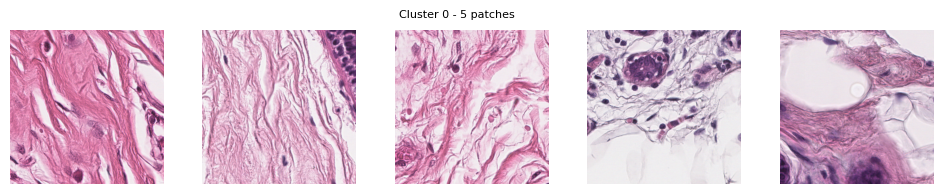

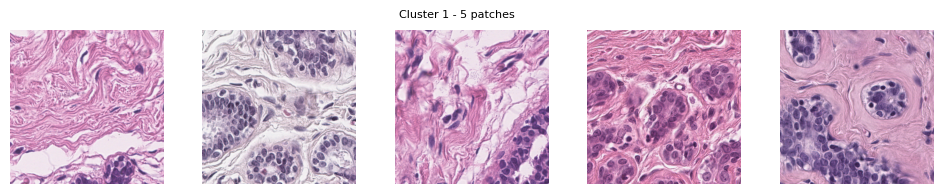

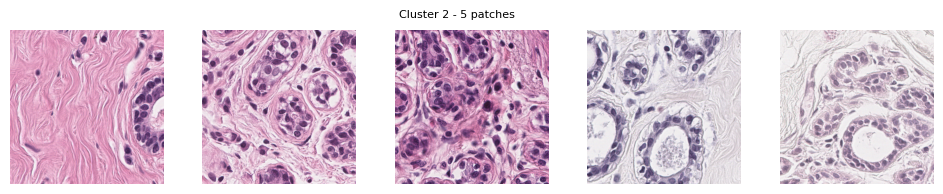

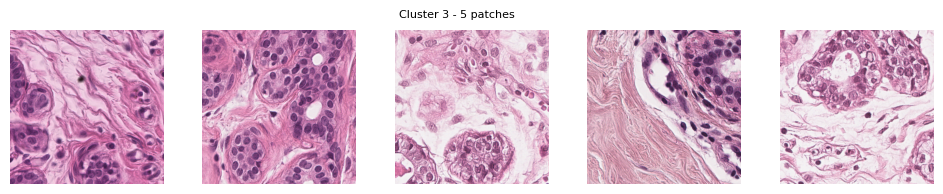

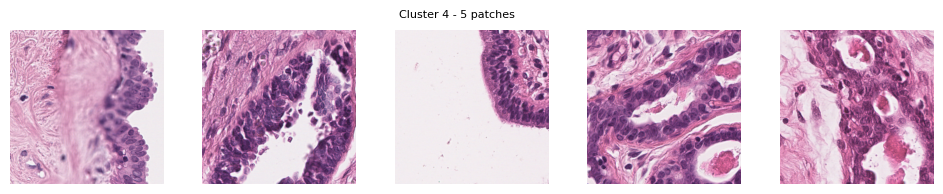

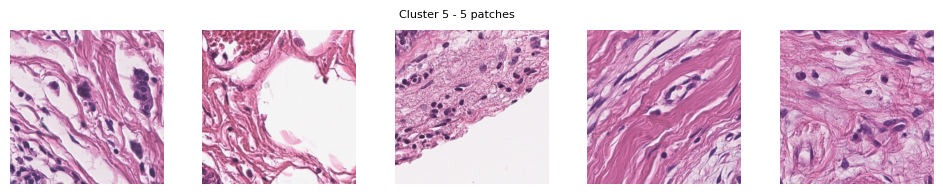

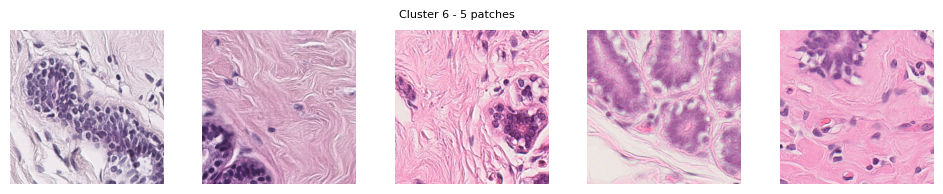

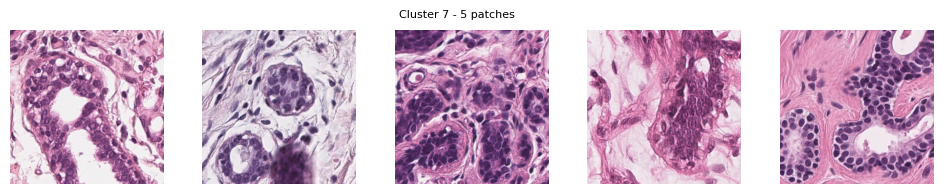

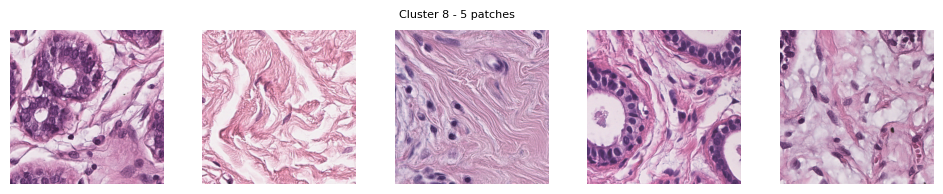

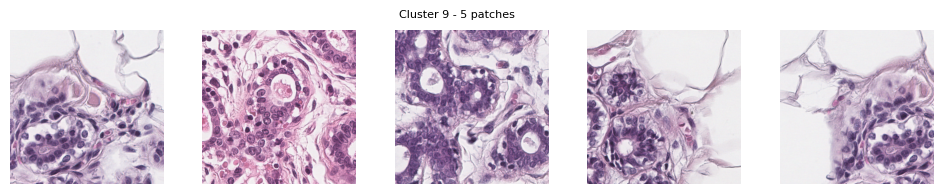

In [8]:
for i, cluster_id in enumerate(np.unique(adata_normal.obs[groupby])):
    plot_cluster_examples(adata_normal, groupby, cluster_id, sampled_number=5, grid_size=[1, 5], figsize=(12, 2), fontsize=8, save_dir=None, save_patches=False)

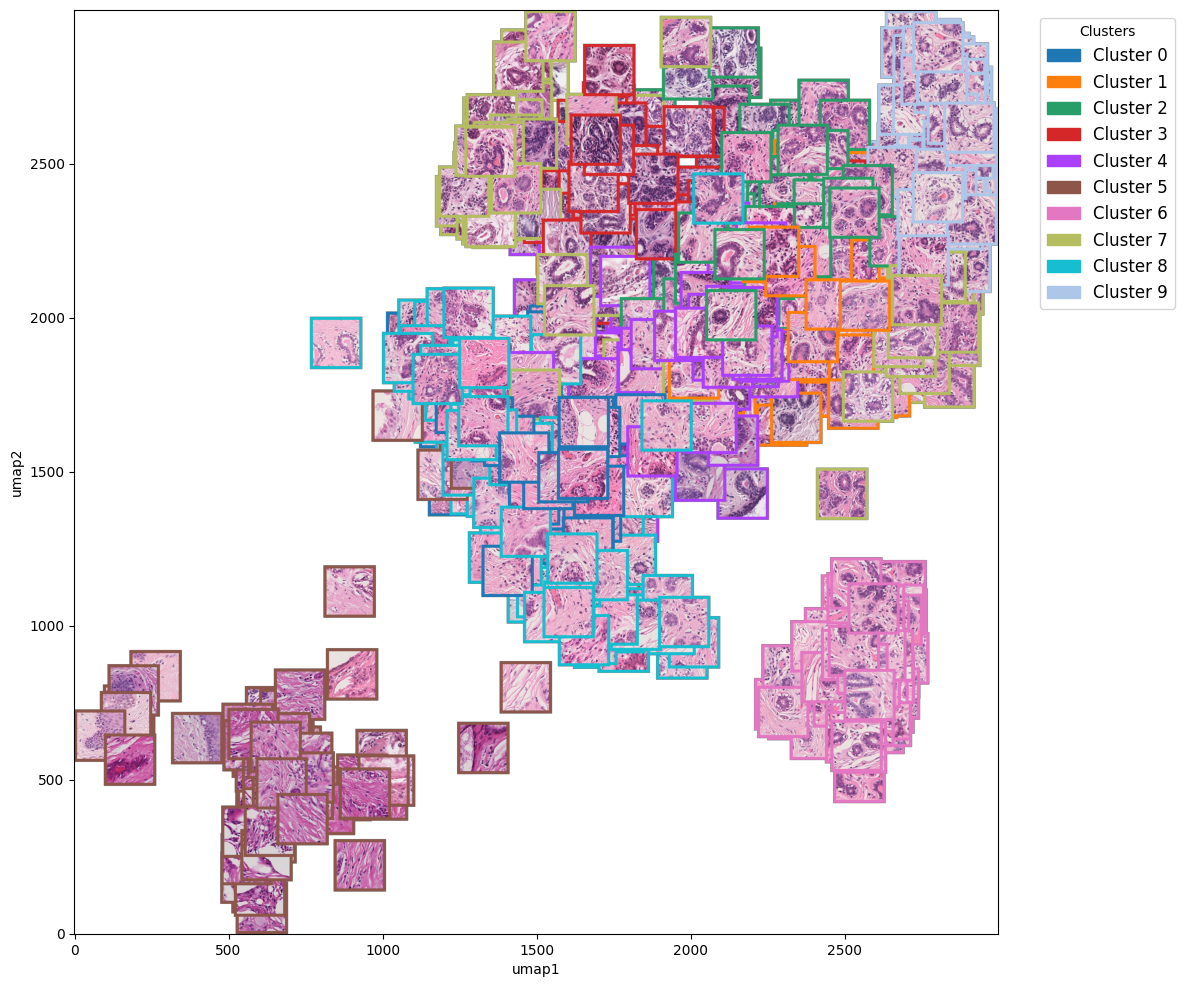

In [9]:
full_img = tsne_HE_overlay(adata_normal, groupby='leiden_0.5', image_size=(3000, 3000), max_dim=150, save_pt=None)